In [1]:
import torch
import torch.utils.data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from map_class import MapClass

In [4]:
#buildings data
building_sizes = [[0.1, 0.3], [0.1, 0.2], [1., 1.], [0.125, 0.2], [0.529, 0.12], [1.0, 0.3], [0.33, 0.3], 
                  [0.4, 0.4], [0.67, 0.3], [.33, 0.7], [.5, 0.1]]
#     torch.rand((10))

In [5]:
#gray colors data
gray_colors = [[0.1], [0.], [1.], [0.125], [0.529], [1.0], [0.33], [0.4], [0.67], [.33], [.5]]
#     torch.rand((10))

In [6]:
# Network configuration

data = gray_colors
batch_size = 4

length = 4
width = 3
number_iterations = 100

move_closer_coef = 0.5
iterations = 100

In [7]:
def basic_visualization(map_):
    plt.imshow(map_);
    plt.colorbar()
    plt.show()

In [8]:
trainloader = ""

def load_data(data, batch_size=4, shuffle=False):
    global dim
    dim = len(data[0])
    
    trainloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    
    return trainloader

In [9]:
def map_view_for_coding(map_):
    return torch.transpose(map_, 0, 1).view(dim, length, width)
#     return map_.view(dim, length, width)

In [10]:
def map_display(map_):
#     return torch.transpose(map_, 0, 1).view(dim, length, width)
    if dim == 1:
        return map_.view(length, width)
    else:
        return map_.view(dim, length, width)

In [11]:
def cycle(map_, training_data, display_step=False):
    for batch in training_data:
#         type(batch)
#         print(batch)
        for row in batch[0]:
#             type(row)
#             print(row)
            i_bmu = map_.find_bmu(row).item()
            map_.move_closer(i_bmu, row)
        
#     print(map_view(map_.map))
    if display_step == True:
        basic_visualization(map_display(map_.map))
        print(map_display(map_.map))

In [12]:
def large_cycle(map_, training_data):
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))
    for i in range(number_iterations):
        cycle(map_, training_data)
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))

In [13]:
training = load_data(data)

In [14]:
map1 = MapClass(length, width, dim, move_closer_coef)

In [15]:
cycle(map1, training)

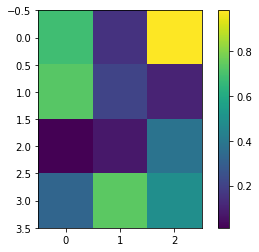

tensor([[0.6851, 0.1537, 0.9817],
        [0.7282, 0.2108, 0.1070],
        [0.0113, 0.0757, 0.3804],
        [0.3265, 0.7377, 0.4920]])


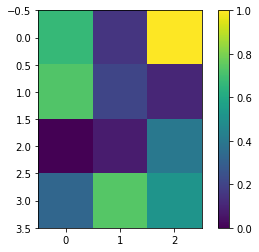

tensor([[6.7000e-01, 1.5367e-01, 1.0000e+00],
        [7.2824e-01, 2.1082e-01, 1.0846e-01],
        [8.8807e-33, 7.5662e-02, 4.0000e-01],
        [3.3000e-01, 7.3773e-01, 5.1695e-01]])


In [16]:
large_cycle(map1, training)

In [17]:
map2 = MapClass(length, width, dim, move_closer_coef)

In [18]:
map2.map

tensor([[0.6122],
        [0.2074],
        [0.4385],
        [0.9473],
        [0.6888],
        [0.2750],
        [0.9004],
        [0.4660],
        [0.5155],
        [0.6960],
        [0.0266],
        [0.3122]])

In [19]:
map2.initialize_locations(map2.map)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2


[(0, 0),
 (0, 1),
 (0, 2),
 (1, 0),
 (1, 1),
 (1, 2),
 (2, 0),
 (2, 1),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 2)]